# Zadanie/założenia

W projekcie wykorzystaliśmy dane dotyczące ofert noclegu z portalu Airbnb w USA (https://www.kaggle.com/stevezhenghp/airbnb-price-prediction).

Założenia:

1. Wykorzystanie prostych wizualizacji do poznania specyfiki danych/rozkładu zmiennych.
2. Analiza współzależności między zmiennymi pod kątem budowy modelu ML.
3. Budowa interaktywnych wizualizacji umożliwiających wykrycie nieoczywistych wzorców w danych.
4. Wykorzystanie mniej standardowych metod wizualizacji danych (geolokalizacja, chmura słów).

# Dane wykorzystane w projekcie

Nieprzetworzone dane składają się z 74111 wierszy i 29 kolumn i są w formacie csv. Zmienne, z którymi mamy do czynienia to:

    ● id: id oferty,
    ● price: cena w za 1 noc (w USD),
    ● property_type: rodzaj kwatery,
    ● room_type: rodzaj pokoju,
    ● amenities: udogodnienia,
    ● accommodates: maksymalna liczba osób w kwaterze,
    ● bathrooms: liczba łazienek,
    ● bed_type: rodzaj łóżka,
    ● cancellation_policy: zasady anulacji rezerwacji,
    ● cleaning_fee: opłata za sprzątanie,
    ● city: miasto, w którym znajduje się kwatera,
    ● description: opis kwatery,
    ● first_review: data pierwszej recenzji,
    ● host_has_profile_pic: informacja, czy kwatera posiada zdjęcie profilowe na portalu,
    ● host_identity_verified: informacja, czy kwatera została zweryfikowana,
    ● host_response_rate: procent odpowiedzi właścicieli kwatery na zapytania,
    ● host_since: data założenia konta Airbnb,
    ● instant_bookable: czy jest możliwość natychmiastowej rezerwacji,
    ● last_review: data ostatniej recenzji,
    ● latitude: szerokość geograficzna,
    ● longitude: długość geograficzna,
    ● name: nazwa kwatery,
    ● neighbourhood: nazwa dzielnicy, w której znajduje się kwatera,
    ● number_of_reviews: liczba dodanych recenzji,
    ● review_scores_rating: ocena kwatery w skali od 0 do 100,
    ● thumbnail_url: adres url kwatery,
    ● zipcode: kod pocztowy,
    ● bedrooms: liczba sypialni w kwaterze,
    ● beds: liczba dostępnych łóżek.

Typy danych jakie występują w naszym zbiorze to: data, tekst oraz liczba. Zmienne na potrzeby wizualizacji będą wymagały różnego typu przekształceń, co zostanie w sposób szczegółowy przedstawione i omówione w
późniejszym etapie opisu projektu.


# Importy

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from ipywidgets import interact
import plotly.express as px
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,750.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
data.columns

Index(['id', 'price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

# Preprocessing

## Sprawdzenie rozkładu ceny

<AxesSubplot:xlabel='price', ylabel='Count'>

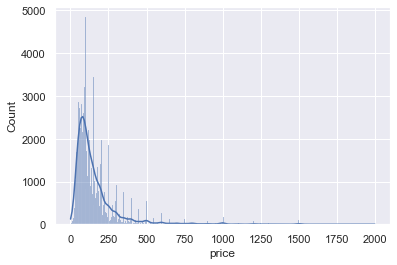

In [5]:
sns.set()
sns.histplot(data["price"], kde=True)

Histogram wskazuje na brak normalności rozkładu ceny, co nie jest pożądaną cechą podczas zarówno modelowania jak i analizowania danych. 

### Przekształcenie ceny do logarytmu

In [6]:
# Zmiana price na log_price
data["log_price"] = data["price"].map(lambda x: math.log(x))

<AxesSubplot:xlabel='log_price', ylabel='Count'>

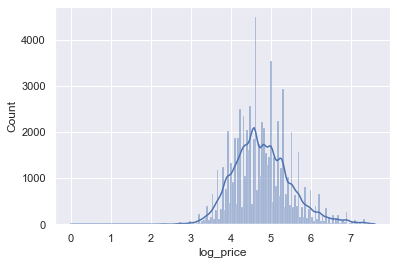

In [7]:
sns.histplot(data["log_price"], kde=True)

Logarytmowanie przyniosło pożądany efekt i teraz rozkład jest zbliżony do normalnego.

## Zgłębienie rozkładu poszczególnych cech

### Rozkład typów pokoi w miastach

<AxesSubplot:xlabel='count', ylabel='city'>

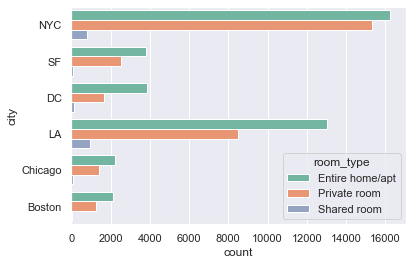

In [8]:
sns.countplot(y="city", hue="room_type", palette="Set2", data=data)

### Liczba kwater mieszczących n-osób

<AxesSubplot:xlabel='accommodates', ylabel='count'>

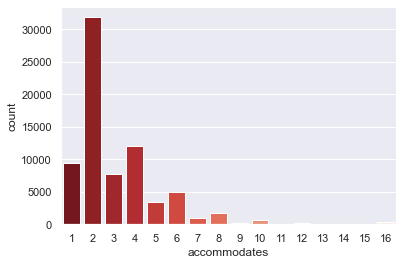

In [9]:
sns.countplot(x="accommodates", palette="Reds_r", data=data)

### Charakterystyka możliwości anulacji rezerwacji

<AxesSubplot:xlabel='count', ylabel='cancellation_policy'>

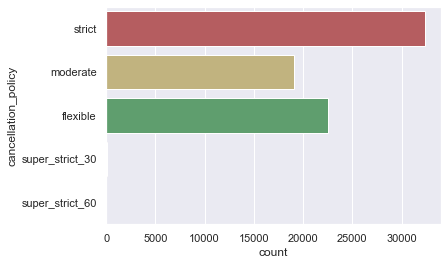

In [10]:
sns.countplot(y="cancellation_policy", palette={"strict": "r",
                                                "super_strict_30": "r", 
                                                "super_strict_60": "r",
                                                "moderate": "y", 
                                                "flexible": "g"}, data=data)

### Czy jest pobierana opłata za sprzątanie

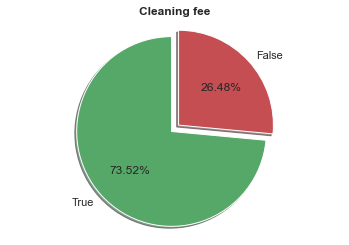

In [38]:
fig, ax = plt.subplots()

x = list(data.cleaning_fee.value_counts())
labels = list(data.cleaning_fee.unique())
ax.pie(x=x, labels=labels, autopct='%1.2f%%', shadow=True, explode=(0, 0.1), startangle=90, colors=["g", "r"])
ax.axis('equal')
ax.set_title('Cleaning fee', fontweight='bold')

plt.show()

### Wykorzystanie liczby udogodnien do analizy

Zmienna 'amenities' posiada wiele unikatowych wartości oraz jest zmienną tekstową, w przypadku której najlepiej byłoby wykorzystać metody przetwarzania języka naturnalnego (NLP). Jednak ze względu na cel projektu, dla uproszczenia, postanowiliśmy stworzyć nową zmienną 'amenities_len', która odpowiada za liczbę udogodnień w obiektach.

In [12]:
data["amenities"]

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 74111, dtype: object

In [13]:
# Stworzenie kolumny z liczba udogodnien
data["amenities_len"] = data["amenities"].map(lambda x: len(x.split(",")))

In [14]:
data["review_scores_rating"].describe()

count    57389.000000
mean        94.067365
std          7.836556
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

### Zależność pomiędzy oceną noclegu, a liczbą udogodnień.

In [15]:
@interact(observations=(0,1.0,0.1))
def correlations(city=["All"]+list(data["city"].unique()),
                 room_type=["All"]+list(data["room_type"].unique()),
                 observations=1.0):
    filtered_df = data[data["review_scores_rating"]>0]
    if city != "All":
        filtered_df = filtered_df[filtered_df["city"] == city]
    if room_type != "All":
        filtered_df = filtered_df[filtered_df["room_type"] == room_type]
    if observations != 100:
        rows_perc = int(len(filtered_df)*observations)
        filtered_df = filtered_df.sample(n=rows_perc)
    sns.scatterplot(data=filtered_df, 
                    x="review_scores_rating", 
                    y="amenities_len",
                    hue="amenities_len",)

interactive(children=(Dropdown(description='city', options=('All', 'NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston…

Interaktywny wykres pozwala w wielu wariantach zauważyć trend wzrostowy między liczbą udogodnień, a oceną obiektu.

### Wypełnianie wartości pustych

Ze względu na dalszą analizę ze zbioru usuwamy zbędne zmienne:
- amenities,
- thumbnail_url,
- zipcode.


In [16]:
arr=['amenities','thumbnail_url','zipcode']

In [17]:
def drop_features(arr):
    for i in arr:
        data.drop([i],axis=1,inplace=True)
        
drop_features(arr)

In [18]:
#Sprawdzenie wartości pustych w całym zbiorze
data.isnull().sum()

id                            0
price                         0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
log_price                     0
amenities_len                 0
dtype: int64

Przyjrzyjmy się także procentowemu rozkładowi braków danych.
Postanowiliśmy nie usuwać zmiennych zawierające braki danych, tylko wypełnić je wybraną metodą.

In [19]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

id                         0.000000
price                      0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
bathrooms                  0.269865
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.405729
host_has_profile_pic       0.253674
host_identity_verified     0.253674
host_response_rate        24.691341
host_since                 0.253674
instant_bookable           0.000000
last_review               21.355804
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.272578
number_of_reviews          0.000000
review_scores_rating      22.563452
bedrooms                   0.122789
beds                       0.176762
log_price                  0.000000
amenities_len              0

Na potrzeby projektu wybraliśmy mniej skomplikowaną metodę wypełniania braków - wypełnianie modą.
Ze względu na typy oraz rodzaje zmiennych, najlepszą opcją będzie uzupełnienie braków najczęściej występującą watrością (unikniemy ułamków np. w przypadku sypialni). Wyjątkiem jest zmienna 'review_scores_rating', przy której możemy zaobserować pewną zależność z cechą 'number_of_reviews'. Istotne jest to, że wiekszość braków w ratingu występuje przy zerowej liczbie opinii. Zatem w tym przypadku wartości puste zostaną zastąpione 0. 

In [20]:
null_columns=data.columns[data.isnull().any()]
null_columns=null_columns.drop(['review_scores_rating'])

In [21]:
def fill_na_with_mode(arr):
    for i in arr:
        data[i].fillna(data[i].mode()[0], inplace=True)
        
fill_na_with_mode(null_columns)

data["review_scores_rating"]=data["review_scores_rating"].fillna(0)

In [22]:
data.isnull().sum()

id                        0
price                     0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
log_price                 0
amenities_len             0
dtype: int64

## Wartości odstające

Ze względu na rozkład normalny zmiennej 'log_price' możemy wykorzystać do odrzucenia wartości odstających regułę 3 sigm.

In [23]:
data_mean, data_std = np.mean(data['log_price']), np.std(data['log_price'])
cut = data_std * 3
lower_bound, upper_bound = data_mean - cut, data_mean + cut
outliers = [x for x in data['log_price'] if x < lower_bound or x > upper_bound]
data = data[(data.log_price < upper_bound) & (data.log_price > lower_bound)]
print('Ilość wartości odstających w zbiorze: %d' % len(outliers))

Ilość wartości odstających w zbiorze: 519


In [24]:
data_copy=data

## Wordclouds

Przy wykorzystaniu wordclouds, sprawdzimy jakie słowa najczęsciej są używane przy tworzeniu opisów. Rozważymy wordclouds w podziale na miasta. W związu z tym do stopwords dołączamy nazwy miast, które zaburzają chmurę słów.

In [25]:
cities=data.city.unique()

In [26]:
stopwords = set(STOPWORDS)
stopwords.update(["NYC", "New",'York', "will", "SF", "San", "DC", "LA", "Angeles", "Los", "Chicago", "Boston", "Francisco"])

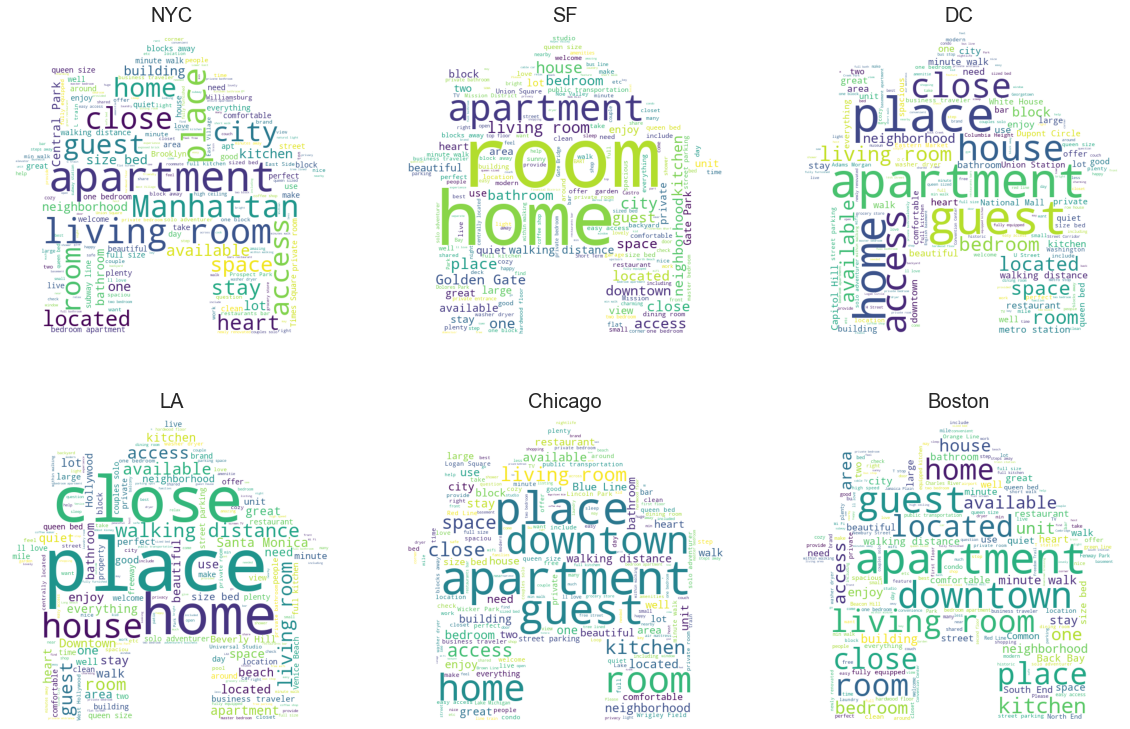

In [27]:
def create_word_cloud(city):
    mask = np.array(Image.open("domek.png"))
    text=[]
    text = " ".join(review for review in data[data["city"]==city].description)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",mode="RGBA", mask=mask).generate(text)
    return wordcloud

fig = plt.figure(figsize=[20,13])
for ind, city in enumerate(cities):
    ax = fig.add_subplot(2,3,ind+1)
    wordcloud = create_word_cloud(city)
    ax.set_title(label=city, fontdict={"fontsize": 20})
    ax.imshow(wordcloud)
    ax.axis('off')

Powyższe grafiki mogą być wykorzystywane przy bardziej szczegółowej analizie tekstu lub do sprawdzenia, które ze słów są najbardzej wykorzystywane i "chwytliwe" podczas konstruowania ogłoszeń.

### Zmienne kategoryczne

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73592 entries, 0 to 74110
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      73592 non-null  int64  
 1   price                   73592 non-null  float64
 2   property_type           73592 non-null  object 
 3   room_type               73592 non-null  object 
 4   accommodates            73592 non-null  int64  
 5   bathrooms               73592 non-null  float64
 6   bed_type                73592 non-null  object 
 7   cancellation_policy     73592 non-null  object 
 8   cleaning_fee            73592 non-null  bool   
 9   city                    73592 non-null  object 
 10  description             73592 non-null  object 
 11  first_review            73592 non-null  object 
 12  host_has_profile_pic    73592 non-null  object 
 13  host_identity_verified  73592 non-null  object 
 14  host_response_rate      73592 non-null

In [29]:
print("Liczba unikatowych elementów w kolumnie neighbourhood:" ,len(data["neighbourhood"].unique()))

Liczba unikatowych elementów w kolumnie neighbourhood: 617


W zbiorze mamy do czynienia z cechami kateorycznymi:'property_type', 'room_type', 'bed_type', 'cancellation_policy','city', które przekształcimy na dummies.
Ze wzlędu na sporą ilośc wartości unikatowych w kolumnie 'neighbourhood', zostanie ona pominięta. 

In [30]:
# Stworzenie dummie columns z kolumn kategorycznych 
data = pd.get_dummies(data, columns=["property_type", "room_type", "bed_type", "cancellation_policy",'city'], )

In [31]:
#Usunięcie ze zbioru kolumn zbędnych przy wyliczaniu korelacji
data_for_corr = data.drop(columns=['neighbourhood','host_response_rate','id', 'price', 'name','description', 'last_review', 'host_since', 'first_review'])

In [32]:
data_for_corr["cleaning_fee"] = data_for_corr["cleaning_fee"].astype(int)

In [33]:
#Przkodowanie zmiennych, w których występują wartości 't' i 'f'.
objects=['host_has_profile_pic','instant_bookable','host_identity_verified']
for i in objects:
    data_for_corr[i] = data_for_corr[i].astype('category')
    data_for_corr[i] = data_for_corr[i].cat.codes

In [34]:
#Wyliczenie korelacji
all_names=list(data_for_corr.columns)
def create_heatmap(feature):
    plt.figure(figsize=(12, 16))
    heatmap = sns.heatmap(data_for_corr.corr()[[feature]].sort_values(by=feature, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG_r')
    heatmap.set_title('Features Correlating with Log_price', fontdict={'fontsize':18}, pad=16);
feature = interact(lambda x: create_heatmap(x), x=all_names)

interactive(children=(Dropdown(description='x', options=('accommodates', 'bathrooms', 'cleaning_fee', 'host_ha…

Ze względu na dużą liczbę cech, utowrzonych po przekształceniach zbioru, zdecydowaliśmy się na mniej tradycyjną formę prezentacji heatmapy. Dzięki temu z łatwością możemy wychwycić zależności pomiędzy poszczególnymi cechami.

### Niestandardowe metody wizualizacji - interaktywna mapa

Jedną z dodatkowych wizualizacji, które chcieliśmy zaprezentować jest mapa. Dzięki rozmieszeniu obiektów w poszczególnych miastach oraz szybkiemu dostępowi do ich najważniejszych cech możemy szybko zauważyć, gdzie są najniższe ceny oraz co w ich ofercie w przybliżeniu możemy dostać. Takie informacje mogą zostać wykorzystane do dalszych analiz.

In [35]:
def create_map(city):
    '''
    
    '''
       
    df_temp = data_copy[data_copy['city'] == city]
    df_temp['price'] = np.round(df_temp['price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["price",'room_type','accommodates'],
                            color='price', 
                            color_continuous_scale='Turbo', #Agsunset_r solar_r Cividis_r Viridis
                            zoom=10)
    
    fig.update_layout(
            title = f'Ceny Airbnb w {city}',
            geo_scope='usa',
            width=950, 
            height=600,
            mapbox_style="open-street-map"
    )

    fig.update_geos(fitbounds="locations")
    fig.show()
    
city = interact(lambda x: create_map(x), x=cities)

interactive(children=(Dropdown(description='x', options=('NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'), value=…

### Niestandardowe metody wizualizacji - interkatywny wykres kołowy

In [36]:
fig = px.sunburst(data_copy, path=['city', 'room_type'],  
                  values='price', color='price',color_continuous_scale='Brwnyl') 
fig.show()

Taki typ wykresu, w tym przypadku, zastępuje nam kilka zwykłych wykresów kołowych. Po kliknieciu na miasto widzimy bardziej szczegółowy rozkład cen według cechy 'room_type'.